In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
#!git clone https://github.com/europeana/rd-img-classification-pilot.git

import sys
sys.path.append('../')

import requests
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

import torch
from src.inference import EuropeanaAPI, load_pytorch_model, make_prediction, plot_prediction


http://data.europeana.eu/item/2058612/object_CHB_001803e5979447daa3a3a3cb4e53e7ee09e3bda9
prediction: building, confidence: 0.9997981190681458







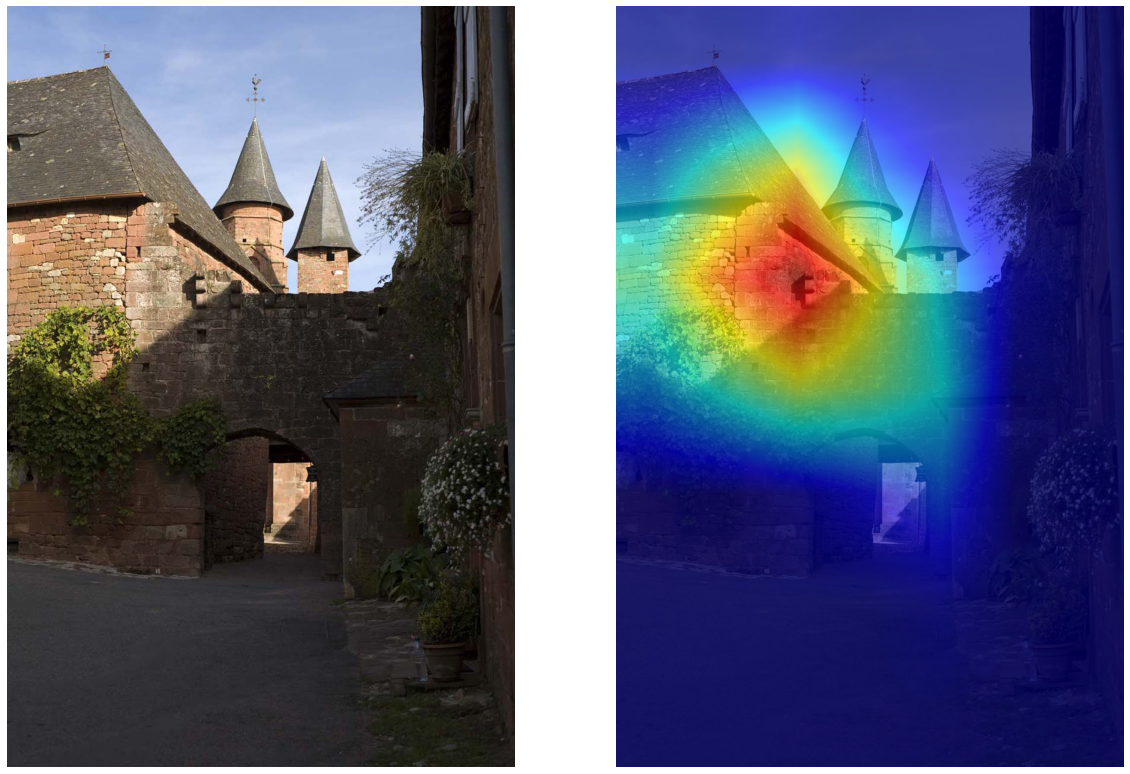

http://data.europeana.eu/item/2058612/object_CHB_00417b07b408b72e467741823d13d012b00a20b7
prediction: painting, confidence: 0.8013017773628235







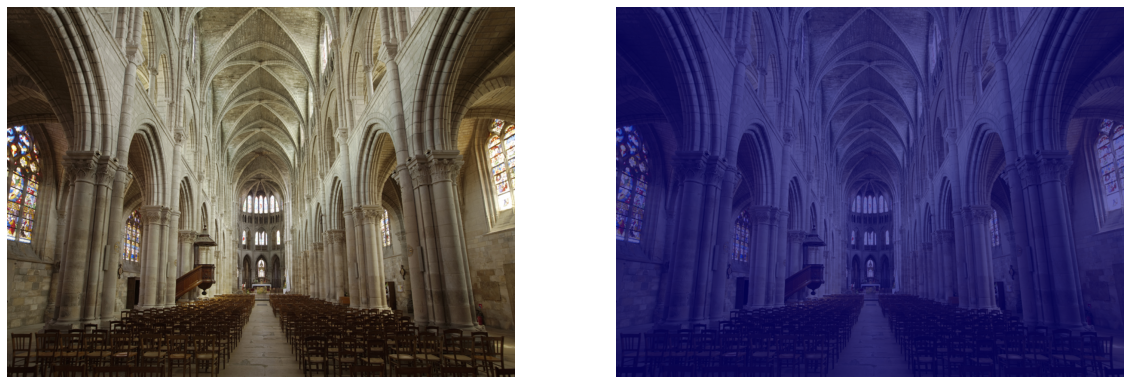

http://data.europeana.eu/item/2058612/object_CHB_004d3f719d27003d84b02e2ef8a7281bc3a08a25
prediction: woodwork, confidence: 0.36786267161369324







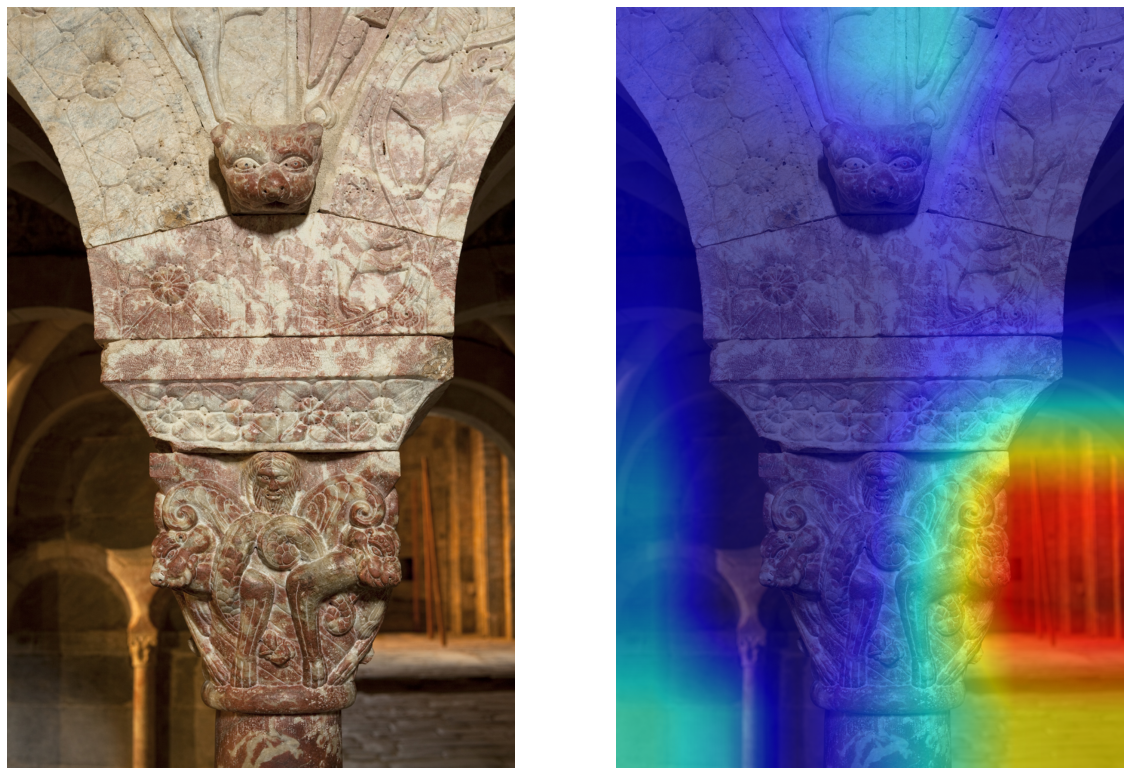

http://data.europeana.eu/item/2058612/object_CHB_0050cfa8367bf82f6fdd9737905dbe7e6a01c924
prediction: building, confidence: 0.999824583530426







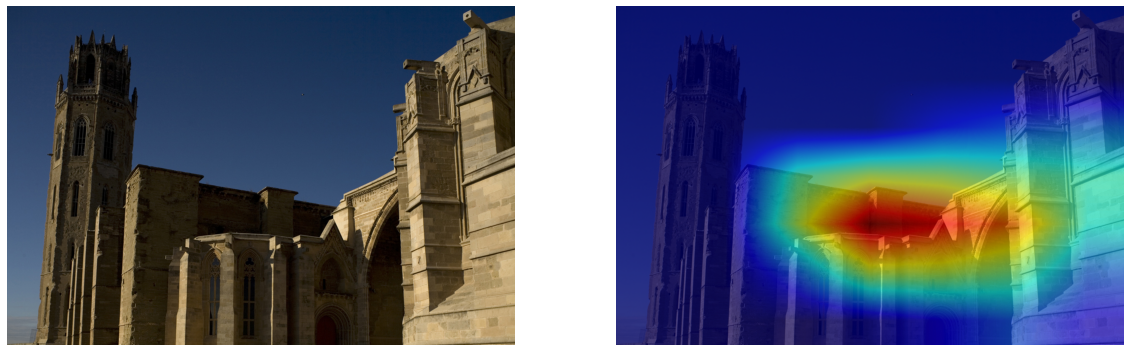

http://data.europeana.eu/item/2058612/object_CHB_009507f39635ca1daa68c891d5d67df0fb03eada
prediction: sculpture, confidence: 0.9978482723236084







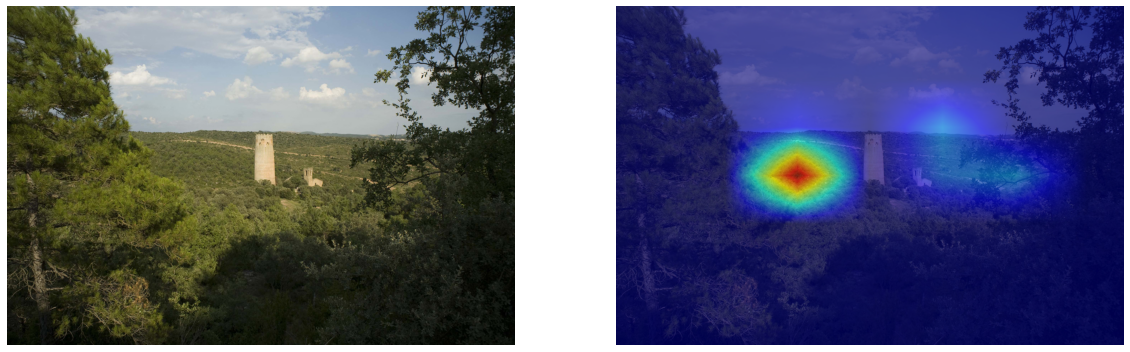

http://data.europeana.eu/item/2058612/object_CHB_009c7554c936f87f9b3185bbb1551f13c2654073
prediction: building, confidence: 0.9722104668617249







KeyboardInterrupt: 

In [8]:


def img_from_CHO(CHO):
  try:
    URL = CHO['edmIsShownBy'][0]
    url_response = requests.get(URL)
    img = Image.open(BytesIO(url_response.content)).convert('RGB')
    return img
  except:
    return None
    

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model, class_index_dict = load_pytorch_model()


eu = EuropeanaAPI('api2demo')

CHO_list = eu.search('building')


for item in CHO_list:
    
  ID = item['id']
  URI = 'http://data.europeana.eu/item'+ID
  img = img_from_CHO(item)
  if not img:
        continue

    
  pred_idx, conf, XAI_img = make_prediction(model,img,device)

  pred =  class_index_dict[str(pred_idx)]

  #print(4*'\n'+URI+'\n prediction:',pred,' confidence ' )

  print(URI)
  print(f'prediction: {pred}, confidence: {conf:0.3}')
  print(4*'\n')
  plot_prediction(img,XAI_img)

    




